In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from qiskit import *

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [4]:
from qiskit import IBMQ

In [5]:
# IBMQ.save_account('MY_API_KEY')

In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
qr = QuantumRegister(2)

In [8]:
cr = ClassicalRegister(2)

In [9]:
circuit = QuantumCircuit(qr, cr)

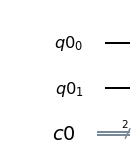

In [10]:
circuit.draw(output = 'mpl')

In [11]:
# Note: h for hadamard gate. First step in creating entanglement
# Additional reading: https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate
circuit.h(qr[0])

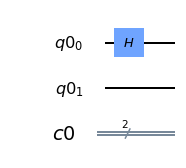

In [12]:
circuit.draw(output = 'mpl')

In [13]:
# Controlled x (cx) creates 2 qubit operation
# Logical if. If this then that

circuit.cx(qr[0], qr[1])

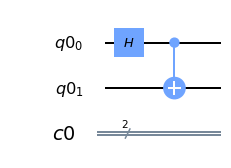

In [14]:
circuit.draw(output = 'mpl')

In [15]:
circuit.measure(qr, cr)

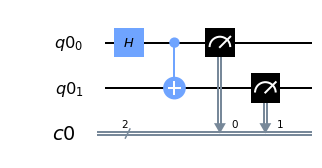

In [16]:
circuit.draw(output = 'mpl')

In [17]:
simulator = Aer.get_backend('qasm_simulator')

In [19]:
result = execute(circuit, backend = simulator).result()

In [20]:
from qiskit.tools.visualization import plot_histogram

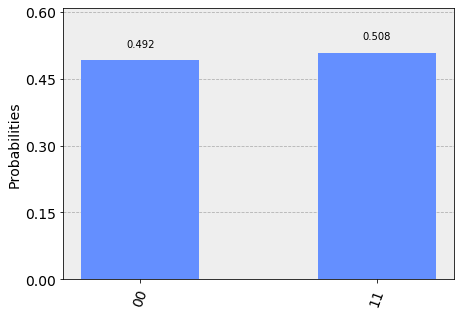

In [21]:
# Note this is being done on a classical computer simulating quantum. Simulates a perfect quantum device
# Once you're confident the experiment will run then try it on a quantum computer
plot_histogram(result.get_counts(circuit))

In [22]:
provider = IBMQ.get_provider('ibm-q')

In [23]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [24]:
job = execute(circuit, backend = qcomp)

In [25]:
from qiskit.tools.monitor import job_monitor

In [26]:
job_monitor(job)

Job Status: job has successfully run


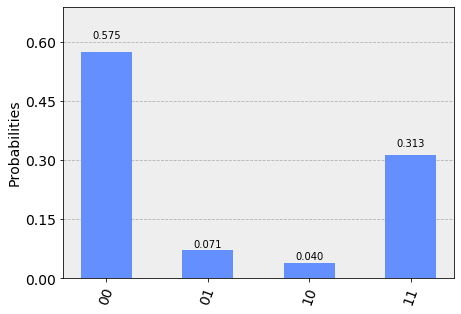

In [27]:
# Done on actual quantum computer. Small quantum errors mean you can have 01 and 10
plot_histogram(job.result().get_counts(circuit))